#03-01 선형 회귀(Linear Regression)

##1. 데이터에 대한 이해(Data Definition)

In [2]:
import torch
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

In [3]:
x_train

tensor([[1.],
        [2.],
        [3.]])

In [4]:
y_train

tensor([[2.],
        [4.],
        [6.]])

##2. 가설(Hypothesis) 수립

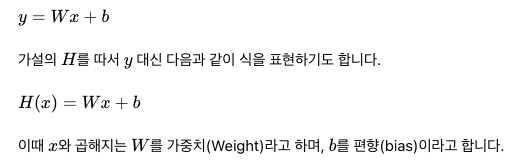

##3. 비용 함수(Cost function)에 대한 이해

비용 함수(cost function) = 손실 함수(loss function) = 오차 함수(error function) = 목적 함수(objective function)

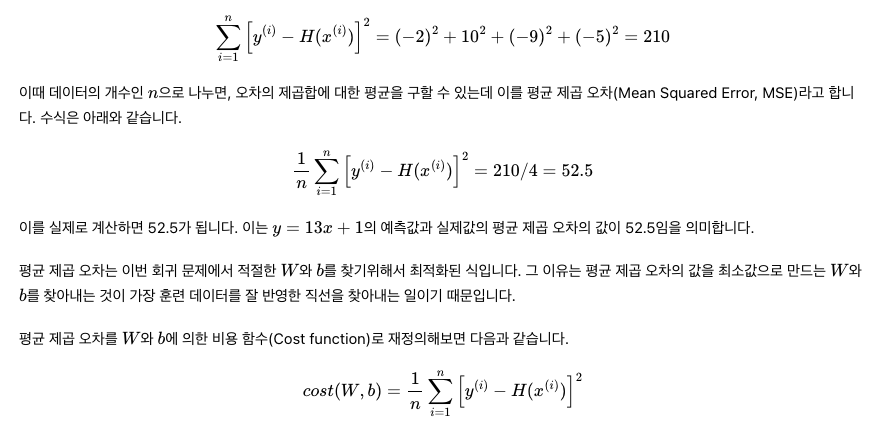

##4. 옵티마이저 - 경사 하강법(Gradient Descent)

옵티마이저(Optimizer) 알고리즘 / 최적화 알고리즘

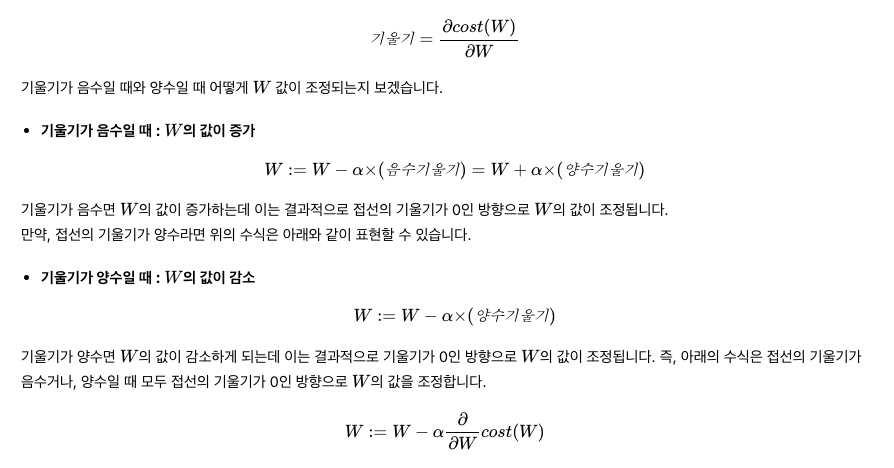

##5. 파이토치로 선형 회귀 구현하기

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [6]:
# 현재 실습하고 있는 파이썬 코드를 재실행해도 다음에도 같은 결과가 나오도록 랜덤 시드(random seed)를 줍니다.
torch.manual_seed(1)

In [7]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

In [8]:
print(x_train)
print(x_train.shape)

tensor([[1.],
        [2.],
        [3.]])
torch.Size([3, 1])


In [9]:
print(y_train)
print(y_train.shape)

tensor([[2.],
        [4.],
        [6.]])
torch.Size([3, 1])


In [11]:
# 가중치 W를 0으로초기화하고 학습을 통해 값이 변경되는 변수임을 명시함.
W = torch.zeros(1, requires_grad=True)  # requires_grad=True -> 이 변수는 학습을 통해 계속 값이 변경되는 변수임을 의미
# 가중치 출력
print(W)

tensor([0.], requires_grad=True)


In [12]:
b = torch.zeros(1,requires_grad=True)
print(b)

tensor([0.], requires_grad=True)


In [13]:
hypothesis = x_train * W + b
print(hypothesis)

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)


In [14]:
cost = torch.mean((hypothesis - y_train) ** 2)
print(cost)

tensor(18.6667, grad_fn=<MeanBackward0>)


In [15]:
optimizer = optim.SGD([W,b], lr=0.01) # SGD => 경사하강법의 일종 / lr 학습률

In [16]:
# gradient를 0으로 초기화
optimizer.zero_grad()
# 비용 함수를 미분하여 gradient 계산
cost.backward()
# W와 b를 업데이트
optimizer.step()

In [18]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])
# 모델 초기화
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.01)

nb_epochs = 2000
for epoch in range(nb_epochs + 1):

    hypothesis = W*x_train + b

    cost = torch.mean((hypothesis - y_train) ** 2)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('Epoch {:4d}/{} WL {:3f},  b: {:3f} Cost:{:.6f}'.format(epoch, nb_epochs, W.item(), b.item(), cost.item()))

Epoch    0/2000 WL 0.186667,  b: 0.080000 Cost:18.666666
Epoch  100/2000 WL 1.745691,  b: 0.578072 Cost:0.048171
Epoch  200/2000 WL 1.800099,  b: 0.454421 Cost:0.029767
Epoch  300/2000 WL 1.842860,  b: 0.357217 Cost:0.018394
Epoch  400/2000 WL 1.876473,  b: 0.280805 Cost:0.011366
Epoch  500/2000 WL 1.902897,  b: 0.220738 Cost:0.007024
Epoch  600/2000 WL 1.923668,  b: 0.173520 Cost:0.004340
Epoch  700/2000 WL 1.939996,  b: 0.136403 Cost:0.002682
Epoch  800/2000 WL 1.952832,  b: 0.107225 Cost:0.001657
Epoch  900/2000 WL 1.962921,  b: 0.084289 Cost:0.001024
Epoch 1000/2000 WL 1.970853,  b: 0.066259 Cost:0.000633
Epoch 1100/2000 WL 1.977087,  b: 0.052085 Cost:0.000391
Epoch 1200/2000 WL 1.981989,  b: 0.040944 Cost:0.000242
Epoch 1300/2000 WL 1.985842,  b: 0.032185 Cost:0.000149
Epoch 1400/2000 WL 1.988870,  b: 0.025301 Cost:0.000092
Epoch 1500/2000 WL 1.991251,  b: 0.019889 Cost:0.000057
Epoch 1600/2000 WL 1.993122,  b: 0.015634 Cost:0.000035
Epoch 1700/2000 WL 1.994594,  b: 0.012290 Cost:

##6. optimizer.zero_grad()가 필요한 이유

In [19]:
import torch
w = torch.tensor(2.0, requires_grad=True)

nb_epochs = 20
for epoch in range(nb_epochs + 1):

    z = 2*w

    z.backward()
    print('수식을 w로 미분한 값 : {}'.format(w.grad))

수식을 w로 미분한 값 : 2.0
수식을 w로 미분한 값 : 4.0
수식을 w로 미분한 값 : 6.0
수식을 w로 미분한 값 : 8.0
수식을 w로 미분한 값 : 10.0
수식을 w로 미분한 값 : 12.0
수식을 w로 미분한 값 : 14.0
수식을 w로 미분한 값 : 16.0
수식을 w로 미분한 값 : 18.0
수식을 w로 미분한 값 : 20.0
수식을 w로 미분한 값 : 22.0
수식을 w로 미분한 값 : 24.0
수식을 w로 미분한 값 : 26.0
수식을 w로 미분한 값 : 28.0
수식을 w로 미분한 값 : 30.0
수식을 w로 미분한 값 : 32.0
수식을 w로 미분한 값 : 34.0
수식을 w로 미분한 값 : 36.0
수식을 w로 미분한 값 : 38.0
수식을 w로 미분한 값 : 40.0
수식을 w로 미분한 값 : 42.0


파이토치는 미분을 통해 얻은 기울기를 이전에 계산된 기울기 값에 누적시키는 특징이 있어서 optimizer.zero_grad()를 통해 미분값을 계속 0으로 초기화시켜줘야 한다.

## 7.torch.manual_seed()를 하는 이유

In [21]:
import torch

In [22]:
torch.manual_seed(3)
print('시드가 3일때')
for i in range(1,3):
    print(torch.rand(1))

시드가 3일때
tensor([0.0043])
tensor([0.1056])


In [23]:
torch.manual_seed(3)
print('시드가 3일때')
for i in range(1,3):
    print(torch.rand(1))

시드가 3일때
tensor([0.0043])
tensor([0.1056])


텐서에는 requires_grad라는 속성이 있다. 이것을 True로 설정하면 자동 미분 기능이 적용된다. 선형 회귀부터 신경망과 같은 복잡한 구조에서 파라미터들이 모두 이 기능이 적용된다. requires_grad = True가 적용된 텐서에 연산을 하면, 계산 그래프가 생성되며 backward 함수를 호출하면 그래프로부터 자동으로 미분이 계산된다.